In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

from astropy import units as u
from astropy import constants as c
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'


### SQL query using the Gaia Database by the ESA to find the stars part of the M67 Cluster
```sql -- Add 3 backticks followed by sql
SELECT  gaia_source.designation,gaia_source.source_id,gaia_source.ra,gaia_source.ra_error,gaia_source.dec,gaia_source.dec_error,
gaia_source.parallax,gaia_source.parallax_error,gaia_source.pmra,gaia_source.pmra_error,gaia_source.pmdec,gaia_source.phot_g_mean_flux_error,
gaia_source.phot_g_mean_mag,gaia_source.phot_bp_mean_flux_error,gaia_source.phot_bp_mean_mag,gaia_source.phot_rp_mean_flux_error,
gaia_source.phot_rp_mean_mag,gaia_source.bp_rp,gaia_source.radial_velocity,gaia_source.radial_velocity_error,gaia_source.phot_variable_flag,gaia_source.teff_val,
gaia_source.a_g_val,gaia_source.lum_val

FROM gaiadr2.gaia_source 

WHERE 
CONTAINS(
	POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),
	CIRCLE('ICRS',132.83,11.82,0.6666666666666666)
)=1  AND  (gaiadr2.gaia_source.parallax>=0.5)


In [13]:
#Importing and Visualizing the data 
query_result = pd.read_csv(r"C:\Users\acerb\phys152\1714631705050O-result.csv")
print("The total amount of stars in the sample is:" , len(query_result))
query_result

The total amount of stars in the sample is: 5531


,source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,...,phot_rp_mean_flux,phot_rp_mean_flux_over_error,phot_rp_mean_mag,bp_rp,radial_velocity,radial_velocity_error,phot_variable_flag,teff_val,a_g_val,lum_val
0,598691984069077248,132.945370,0.601027,11.258305,0.436349,2.390477,0.764513,9.598903,1.281218,-0.035875,...,268.019527,28.804634,18.691504,2.462278,NaN,NaN,NOT_AVAILABLE,NaN,NaN,NaN
1,598690369158191872,132.912227,0.084070,11.225536,0.049075,0.718323,0.104095,0.525116,0.178293,-9.573499,...,NaN,NaN,NaN,NaN,NaN,NaN,NOT_AVAILABLE,NaN,NaN,NaN
2,598691228155046016,133.025408,0.906173,11.228774,0.613882,3.774747,1.112118,-2.521159,2.124207,-3.763216,...,150.255828,17.782673,19.319841,1.390373,NaN,NaN,NOT_AVAILABLE,NaN,NaN,NaN
3,598692190224359808,132.925903,1.373622,11.272759,0.985739,1.717389,1.701020,2.118892,3.197051,-2.197067,...,117.219813,12.843660,19.589417,1.263166,NaN,NaN,NOT_AVAILABLE,NaN,NaN,NaN
4,598695660556715136,132.942568,0.777448,11.318312,0.544164,1.111886,0.949824,-3.976134,1.699635,7.284241,...,193.031692,26.778305,19.047848,2.070683,NaN,NaN,NOT_AVAILABLE,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5526,607997120905720320,132.488938,0.033668,12.288984,0.022773,0.525231,0.041895,-3.038462,0.072867,-1.522457,...,11391.455581,633.260560,14.620472,0.832819,NaN,NaN,NOT_AVAILABLE,5785.75,0.8017,2.424457
5527,607997670661533696,132.530265,0.190403,12.327733,0.150326,1.174508,0.233415,-5.436325,0.442220,-21.041063,...,946.920958,153.042630,17.321136,1.934572,NaN,NaN,NOT_AVAILABLE,NaN,NaN,NaN
5528,607995673501015808,132.387229,0.118963,12.265745,0.068797,0.800163,0.137758,-1.467554,0.240876,-3.022577,...,1406.420506,129.336780,16.891632,1.143101,NaN,NaN,NOT_AVAILABLE,NaN,NaN,NaN
5529,607996395055520896,132.356474,0.180255,12.263674,0.102414,0.588576,0.209761,-3.079256,0.382948,-2.233399,...,817.615616,80.645980,17.480547,1.435125,NaN,NaN,NOT_AVAILABLE,NaN,NaN,NaN


In [17]:
#Filtering out two values Luminosity and Parallax which would help filter the data in the next step
query_result_filtered = query_result.dropna(subset=['parallax'])
luminosities = query_result_filtered['lum_val']
parallax = query_result_filtered['parallax']

## Making a histogram of the Parallaxes
 A cluster is a region with a high density of stars, and since all the stars in the cluster are within a distance of less than 2 kiloparsecs (kpc), an overdensity of stars will indicate the cluster's location. It will also allow us to filter out data.


In [29]:
#After messing around this gives the best configuration to find the overdesnsity of stars!
bins = np.arange(0,5,0.5)

5531


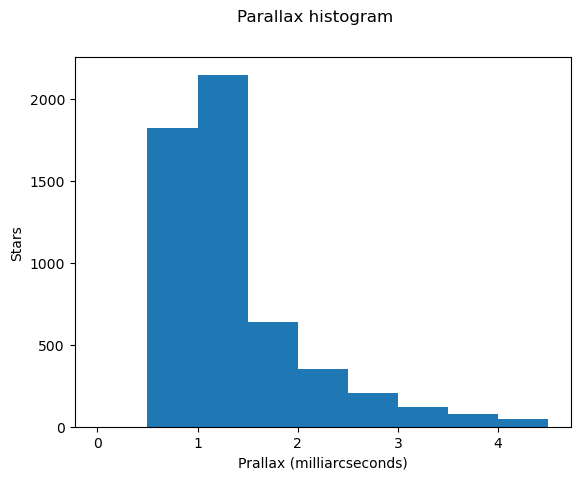

In [27]:
print(len(parallax))
n, bins, patches = plt.hist(parallax, bins, rwidth = 1)
plt.xlabel("Prallax (milliarcseconds)")
plt.ylabel("Stars")
plt.suptitle("Parallax histogram")
plt.show()

In [35]:
#Understanding the exact bins and stars in the histogram
print(bins)
print(n)
#Comparing to the total number of parallaxes
print(sum(n))

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5]
[   0. 1823. 2147.  638.  350.  203.  121.   79.   46.]
5407.0


We lost around 100 stars due to the definition of the bins. This is totally fine! Those stars that do not fit into the bins will not provide any meaningful data in this exercise. 

## Finding the best distance which is the "supposed" distance to the M67 Cluster

In [58]:
#The width of the parallax overdensity is from 1 to 1.5 arcseconds
distance = 1/(1/1000)
distance2 = 1/(1.5/1000) #converting miliarcsec to arcsec
print("The distance range is {0:.2f} to {1:.2f} parsecs".format(distance,distance2))
#The "Best" distance would be the middle of the bin or the middle of the two distances above
center = (distance - distance2)/2
best = center + distance2
print("The best distance is around {:.2f} parsecs".format(best))

The distance range is 1000.00 to 666.67 parsecs
The best distance is around 833.33 parsecs


## Making a new query based on the filters we just found (a parallax between 1 and 1.5) to make a color-magnitude diagram (CMD)
```sql -- Add 3 backticks followed by sql
SELECT gaia_source.source_id,gaia_source.ra,gaia_source.ra_error,
gaia_source.dec,gaia_source.dec_error,gaia_source.parallax,gaia_source.parallax_error,
gaia_source.pmra,gaia_source.pmra_error,gaia_source.pmdec,gaia_source.pmdec_error,
gaia_source.phot_g_mean_flux,gaia_source.phot_g_mean_flux_over_error,gaia_source.phot_g_mean_mag,gaia_source.phot_bp_mean_flux,gaia_source.phot_bp_mean_flux_over_error,
gaia_source.phot_bp_mean_mag,gaia_source.phot_rp_mean_flux,gaia_source.phot_rp_mean_flux_over_error,gaia_source.phot_rp_mean_mag,gaia_source.bp_rp,gaia_source.radial_velocity,
gaia_source.radial_velocity_error,gaia_source.phot_variable_flag,gaia_source.teff_val,gaia_source.a_g_val,gaia_source.lum_val

FROM gaiadr2.gaia_source 

WHERE 
CONTAINS(
	POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),
	CIRCLE('ICRS',132.83,11.82,0.6666666666666666)
)=1  AND  (gaiadr2.gaia_source.parallax>=1 AND gaiadr2.gaia_source.parallax<=1.5)

In [70]:
query_result2 = pd.read_csv(r"C:\Users\acerb\phys152\1714632460166O-result.csv")
print("The total amount of stars in the sample is:" , len(query_result2))
query_result2

The total amount of stars in the sample is: 2147


,source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,...,phot_rp_mean_flux,phot_rp_mean_flux_over_error,phot_rp_mean_mag,bp_rp,radial_velocity,radial_velocity_error,phot_variable_flag,teff_val,a_g_val,lum_val
0,598695660556715136,132.942568,0.777448,11.318312,0.544164,1.111886,0.949824,-3.976134,1.699635,7.284241,...,193.031692,26.778305,19.047848,2.070683,NaN,NaN,NOT_AVAILABLE,NaN,NaN,NaN
1,598688930342564224,132.896944,1.309537,11.169345,0.915923,1.408687,1.792303,-8.879095,2.823408,-5.949531,...,134.041575,12.387445,19.443820,1.741634,NaN,NaN,NOT_AVAILABLE,NaN,NaN,NaN
2,598694767207638272,132.818986,1.143645,11.308134,0.733095,1.256406,1.240176,3.409957,2.302884,-4.492450,...,118.902418,16.155743,19.573944,1.286476,NaN,NaN,NOT_AVAILABLE,NaN,NaN,NaN
3,598692774338692992,132.990007,1.306852,11.328643,1.047437,1.236442,1.618344,2.509200,2.976027,-2.180589,...,93.572373,13.101430,19.834051,0.930893,NaN,NaN,NOT_AVAILABLE,NaN,NaN,NaN
4,598679270963077248,133.086449,0.763759,11.208007,0.495242,1.222374,0.972946,-7.129201,1.649694,-13.874766,...,245.061710,37.235210,18.788730,2.293766,NaN,NaN,NOT_AVAILABLE,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,608021516319899648,132.516254,0.030844,12.382652,0.021426,1.111215,0.039544,-11.033385,0.065612,-3.017607,...,14035.428554,513.356700,14.393856,0.936432,NaN,NaN,NOT_AVAILABLE,5429.0,0.0257,0.656688
2143,607996841734363264,132.375066,1.339577,12.313900,0.923197,1.405999,1.632694,1.511209,2.921539,-5.316301,...,97.571285,13.918682,19.788614,1.948109,NaN,NaN,NOT_AVAILABLE,NaN,NaN,NaN
2144,607998735813364864,132.472209,0.283764,12.352109,0.184190,1.331754,0.350902,6.721261,0.617378,-5.776616,...,606.170808,77.738914,17.805433,2.034555,NaN,NaN,NOT_AVAILABLE,NaN,NaN,NaN
2145,608021718183184768,132.596204,0.999545,12.382197,0.612366,1.018583,1.098477,3.777298,1.921260,-5.970401,...,141.198532,22.762497,19.387344,1.886606,NaN,NaN,NOT_AVAILABLE,NaN,NaN,NaN


In [72]:
#Pulling the needed data from the table
query_result_filtered2 = query_result2.dropna(subset=['bp_rp'])
app_mag =query_result_filtered2['phot_g_mean_mag'] 
parallax2 = query_result_filtered2['parallax']
bp_rp = query_result_filtered2['bp_rp']

In [74]:
#Calculating the Absolute Magnitude using the parallax and the apparent magnitude collums in the table
d = 1 / parallax2
abs_mag = app_mag - 5*np.log10(d/10)

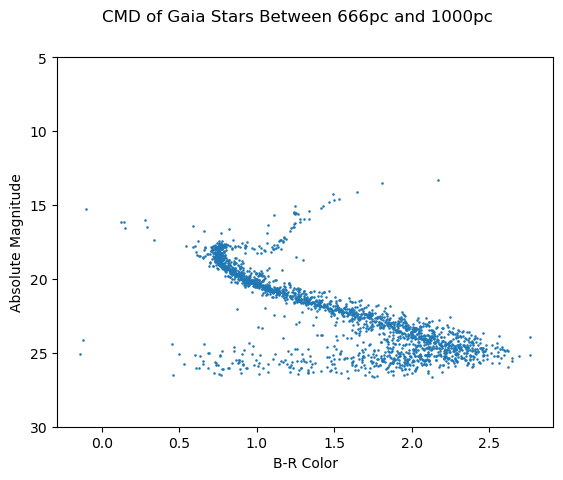

In [78]:
#Making the CMD
plt.scatter(bp_rp, abs_mag, s=0.7)
plt.ylim(30,5)
plt.ylabel("Absolute Magnitude")
plt.xlabel("B-R Color")
plt.suptitle("CMD of Gaia Stars Between 666pc and 1000pc")
plt.show()

## Conclusions 
This is a nice main sequence forming, with some older stars in the sequence becoming red giants. Although there are interlopers in the data that are not part of the cluster, it might be possible to filter these out by analyzing the proper motion of the stars. Since the stars in the cluster are relatively close to one another, their proper motion should be similar. In contrast, the interlopers would have noticeable differences in proper motion compared to the cluster stars.